In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [31]:
dataset = pd.read_excel('US Bankruptcy Dataset.xlsx', sheet_name='US Bankruptcy Data', header=0, index_col=0)

In [32]:
dataset.head()

,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
company_name,,,,,,,,,,,,,,,,,,,,
C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [33]:
print(dataset.columns)

Index(['status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18'],
      dtype='object')


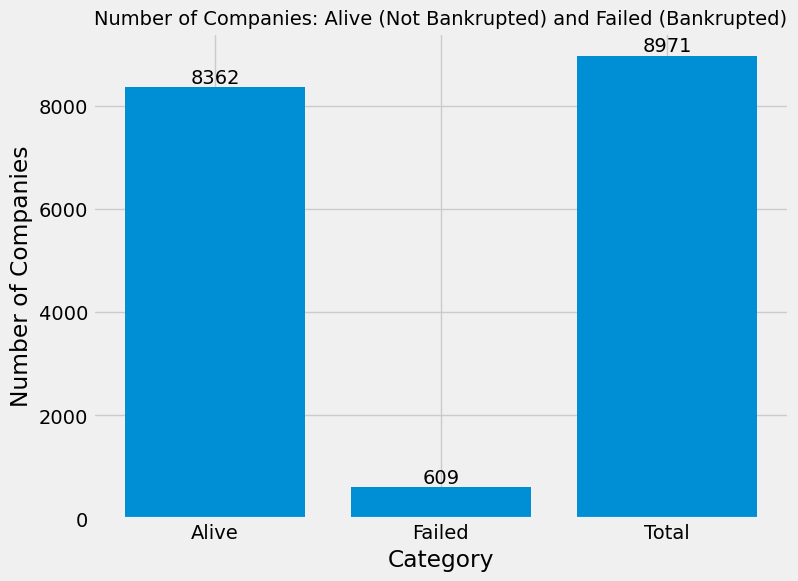

In [34]:
plt.style.use('fivethirtyeight')

status_counts = dataset.groupby(['company_name', 'status_label']).size().unstack(fill_value=0)
status_counts = status_counts.rename(columns={'alive': 'Alive_Count', 'failed': 'Failed_Count'})

total_alive = status_counts['Alive_Count'].gt(0).sum()
total_failed = status_counts['Failed_Count'].gt(0).sum()
total_companies = total_alive + total_failed

categories = ['Alive', 'Failed', 'Total']
counts = [total_alive, total_failed, total_companies]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title("Number of Companies: Alive (Not Bankrupted) and Failed (Bankrupted)", fontsize=14)
plt.ylabel("Number of Companies")
plt.xlabel("Category")

plt.show()

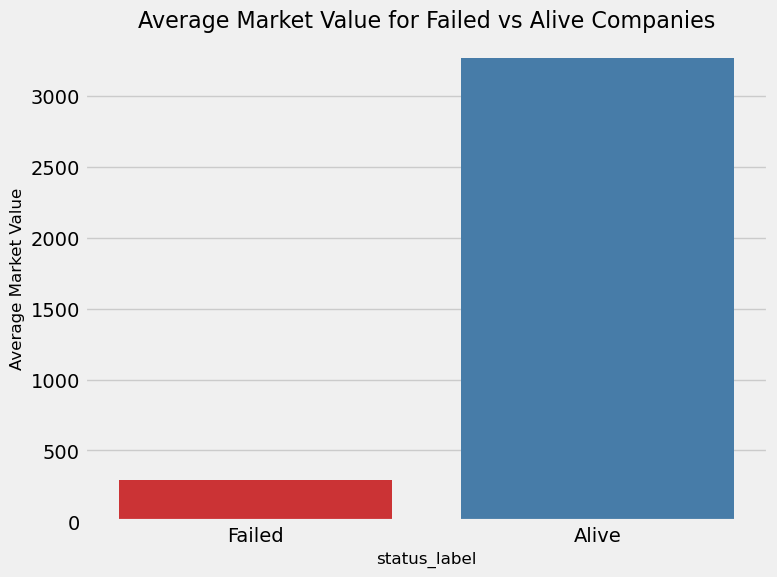

In [35]:
dataset['status_label_numeric'] = dataset['status_label'].map({'alive': 0, 'failed': 1})

failed_companies = dataset[dataset['status_label_numeric'] == 1]
last_failed_year = failed_companies.groupby('company_name')['year'].max()
last_failed_data = pd.merge(failed_companies, last_failed_year, on=['company_name', 'year'])


average_X8_failed = last_failed_data['X8'].mean()
alive_companies = dataset[dataset['status_label_numeric'] == 0]
last_alive_year = alive_companies.groupby('company_name')['year'].max()

last_alive_data = pd.merge(alive_companies, last_alive_year, on=['company_name', 'year'])
average_X8_alive = last_alive_data['X8'].mean()

average_X8_values = {
    'Failed': average_X8_failed,
    'Alive': average_X8_alive
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(average_X8_values.keys()), y=list(average_X8_values.values()), palette='Set1')

plt.title('Average Market Value for Failed vs Alive Companies', fontsize=16)
plt.ylabel('Average Market Value', fontsize=12)
plt.xlabel('status_label', fontsize=12)
plt.tight_layout()

plt.show()

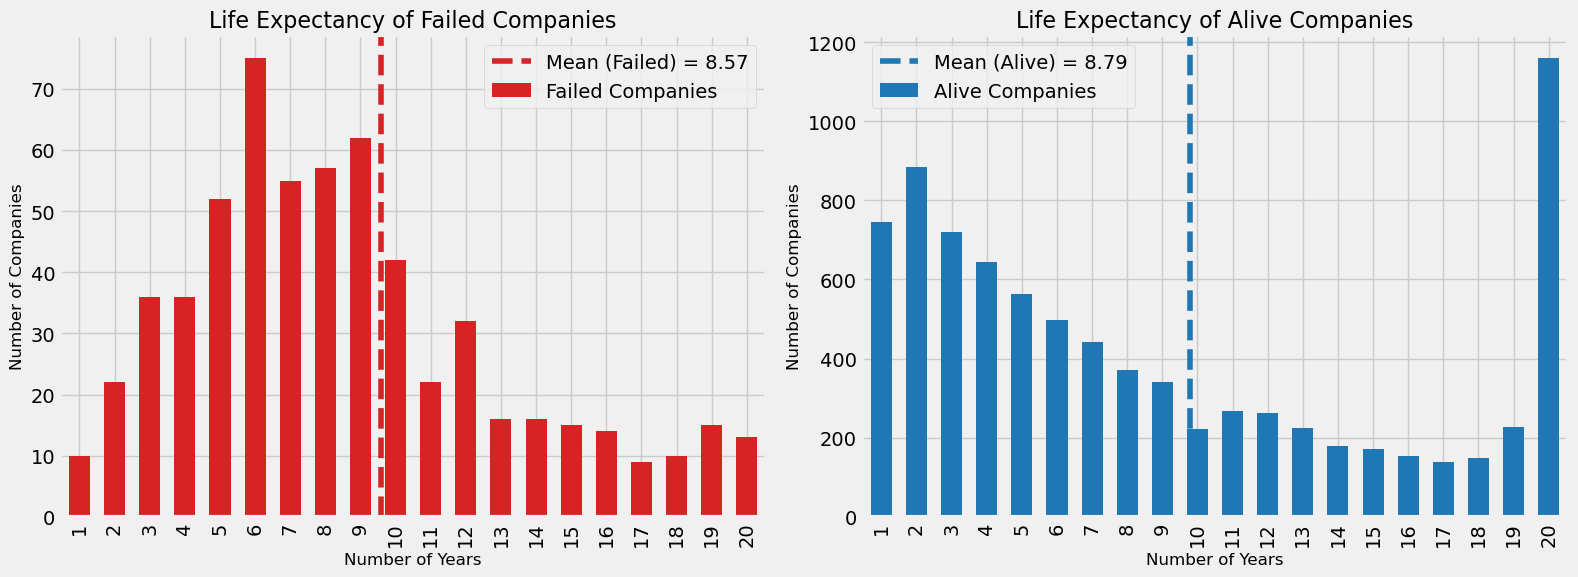

In [36]:
failed_companies = dataset[dataset['status_label'] == 'failed']
alive_companies = dataset[dataset['status_label'] == 'alive']

failed_years = failed_companies.groupby('company_name')['year'].nunique()

alive_years = alive_companies.groupby('company_name')['year'].nunique()

failed_years_count = failed_years.value_counts().sort_index()
alive_years_count = alive_years.value_counts().sort_index()

mean_failed_years = failed_years.mean()
mean_alive_years = alive_years.mean()

color_alive = "#1f77b4" 
color_failed = "#d62425" 

fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns for side-by-side graphs

failed_years_count.plot(kind='bar', color=color_failed, width=0.6, ax=ax[0], label='Failed Companies')
ax[0].axvline(mean_failed_years, color=color_failed, linestyle='--', label=f'Mean (Failed) = {mean_failed_years:.2f}')
ax[0].set_title('Life Expectancy of Failed Companies', fontsize=16)
ax[0].set_xlabel('Number of Years', fontsize=12)
ax[0].set_ylabel('Number of Companies', fontsize=12)
ax[0].legend()

alive_years_count.plot(kind='bar', color=color_alive, width=0.6, ax=ax[1], label='Alive Companies')
ax[1].axvline(mean_alive_years, color=color_alive, linestyle='--', label=f'Mean (Alive) = {mean_alive_years:.2f}')
ax[1].set_title('Life Expectancy of Alive Companies', fontsize=16)
ax[1].set_xlabel('Number of Years', fontsize=12)
ax[1].set_ylabel('Number of Companies', fontsize=12)
ax[1].legend()

plt.tight_layout()
plt.savefig('Life Expectancy of Failed vs. Alive Companies.png', dpi=300)  # Save as PNG with 300 DPI

plt.show()

In [37]:
dataset = dataset.sort_values(by=['company_name', 'year'])

def update_status(group):
    if 'failed' in group['status_label'].values:
        latest_failed_year = group[group['status_label'] == 'failed']['year'].max()
        group.loc[group['year'] < latest_failed_year, 'status_label'] = 'alive'
    return group

dataset = dataset.groupby('company_name').apply(update_status)

print(dataset.head())

             status_label  year       X1       X2      X3      X4       X5  \
company_name                                                                 
C_1                 alive  1999  511.267  833.107  18.373  89.031  336.018   
C_1                 alive  2000  485.856  713.811  18.577  64.367  320.590   
C_1                 alive  2001  436.656  526.477  22.496  27.207  286.588   
C_1                 alive  2002  396.412  496.747  27.172  30.745  259.954   
C_1                 alive  2003  432.204  523.302  26.680  47.491  247.245   

                  X6       X7        X8  ...      X10      X11     X12  \
company_name                             ...                             
C_1           35.163  128.348  372.7519  ...  740.998  180.447  70.658   
C_1           18.531  115.187  377.1180  ...  701.854  179.987  45.790   
C_1          -58.939   77.528  364.5928  ...  710.199  217.699   4.711   
C_1          -12.410   66.322  143.3295  ...  686.621  164.658   3.573   
C_1      

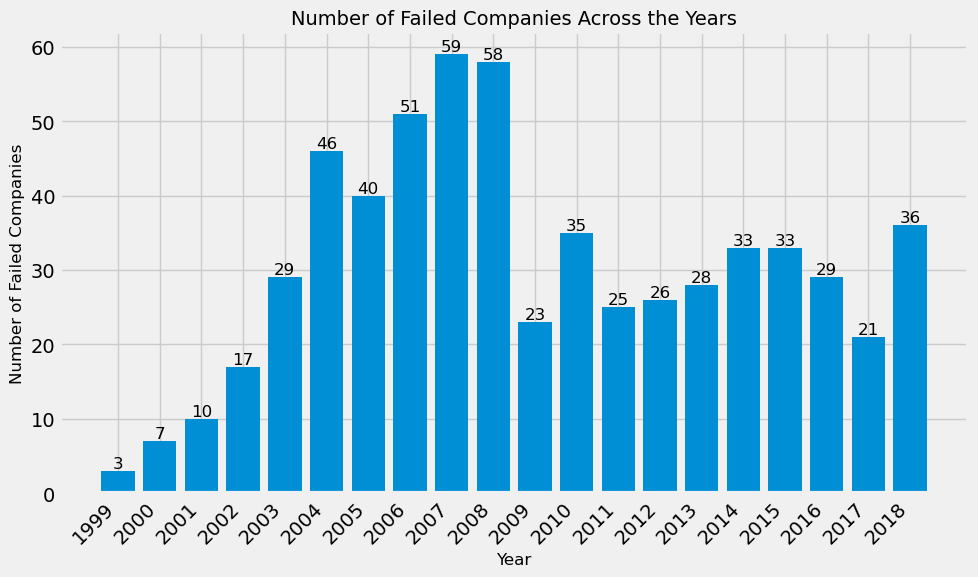

In [38]:
failed_companies = dataset[dataset['status_label'] == 'failed']

failed_counts = failed_companies.groupby('year').size()
plt.figure(figsize=(10, 6))
bars = plt.bar(failed_counts.index, failed_counts.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), 
             ha='center', va='bottom', fontsize=12)

plt.title('Number of Failed Companies Across the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Failed Companies', fontsize=12)

plt.xticks(failed_counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()